## Logestic Regression

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = load_diabetes()
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [11]:
X,y = df.data,df.target
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [13]:
y_binary = (y>np.median(y)).astype(int)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y_binary,test_size=.32,random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.7746478873239436

In [21]:
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[57, 18],
       [14, 53]])

In [23]:
classReport = classification_report(y_test,y_pred)
print(classReport)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        75
           1       0.75      0.79      0.77        67

    accuracy                           0.77       142
   macro avg       0.77      0.78      0.77       142
weighted avg       0.78      0.77      0.77       142



### Scatter plot

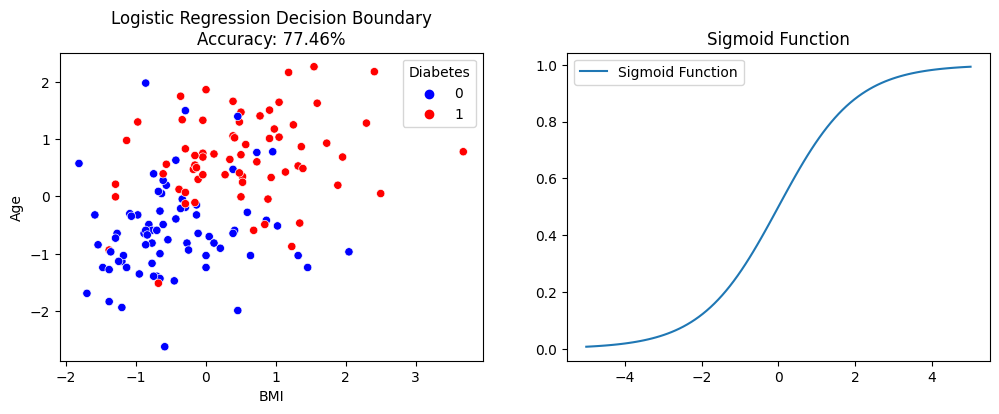

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
    acc * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.subplot(122)
x = np.linspace(-5, 5, 100)  # Range for x-axis
y = 1 / (1 + np.exp(-x))  # Sigmoid function calculation
plt.plot(x, y, label="Sigmoid Function")
plt.title("Sigmoid Function")
plt.legend()
plt.show()

### ROC

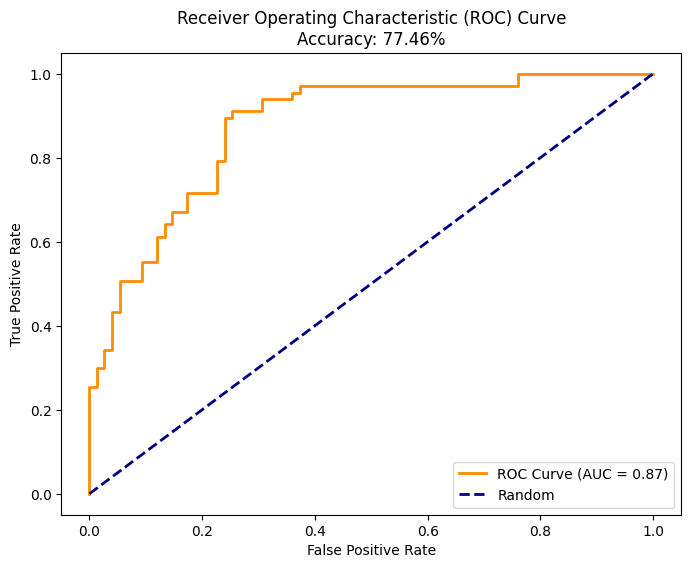

In [32]:

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
	acc * 100))
plt.legend(loc="lower right")
plt.show()
